In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from helpers.dslabs_functions import plot_bar_chart, get_variable_types, define_grid, HEIGHT, plot_multibar_chart, determine_outlier_thresholds_for_var, count_outliers, derive_date_variables, analyse_date_granularity
import seaborn as sns
import numpy as np

In [14]:
fig_path = "../figures/data_profiling/"

In [15]:
df = pd.read_csv('../datasets/class_pos_covid.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
3,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,NaN,Yes,...,1.80,84.82,26.08,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [16]:
get_variable_types(df)["symbolic"]

['State',
 'GeneralHealth',
 'LastCheckupTime',
 'RemovedTeeth',
 'HadDiabetes',
 'SmokerStatus',
 'ECigaretteUsage',
 'RaceEthnicityCategory',
 'AgeCategory',
 'TetanusLast10Tdap']

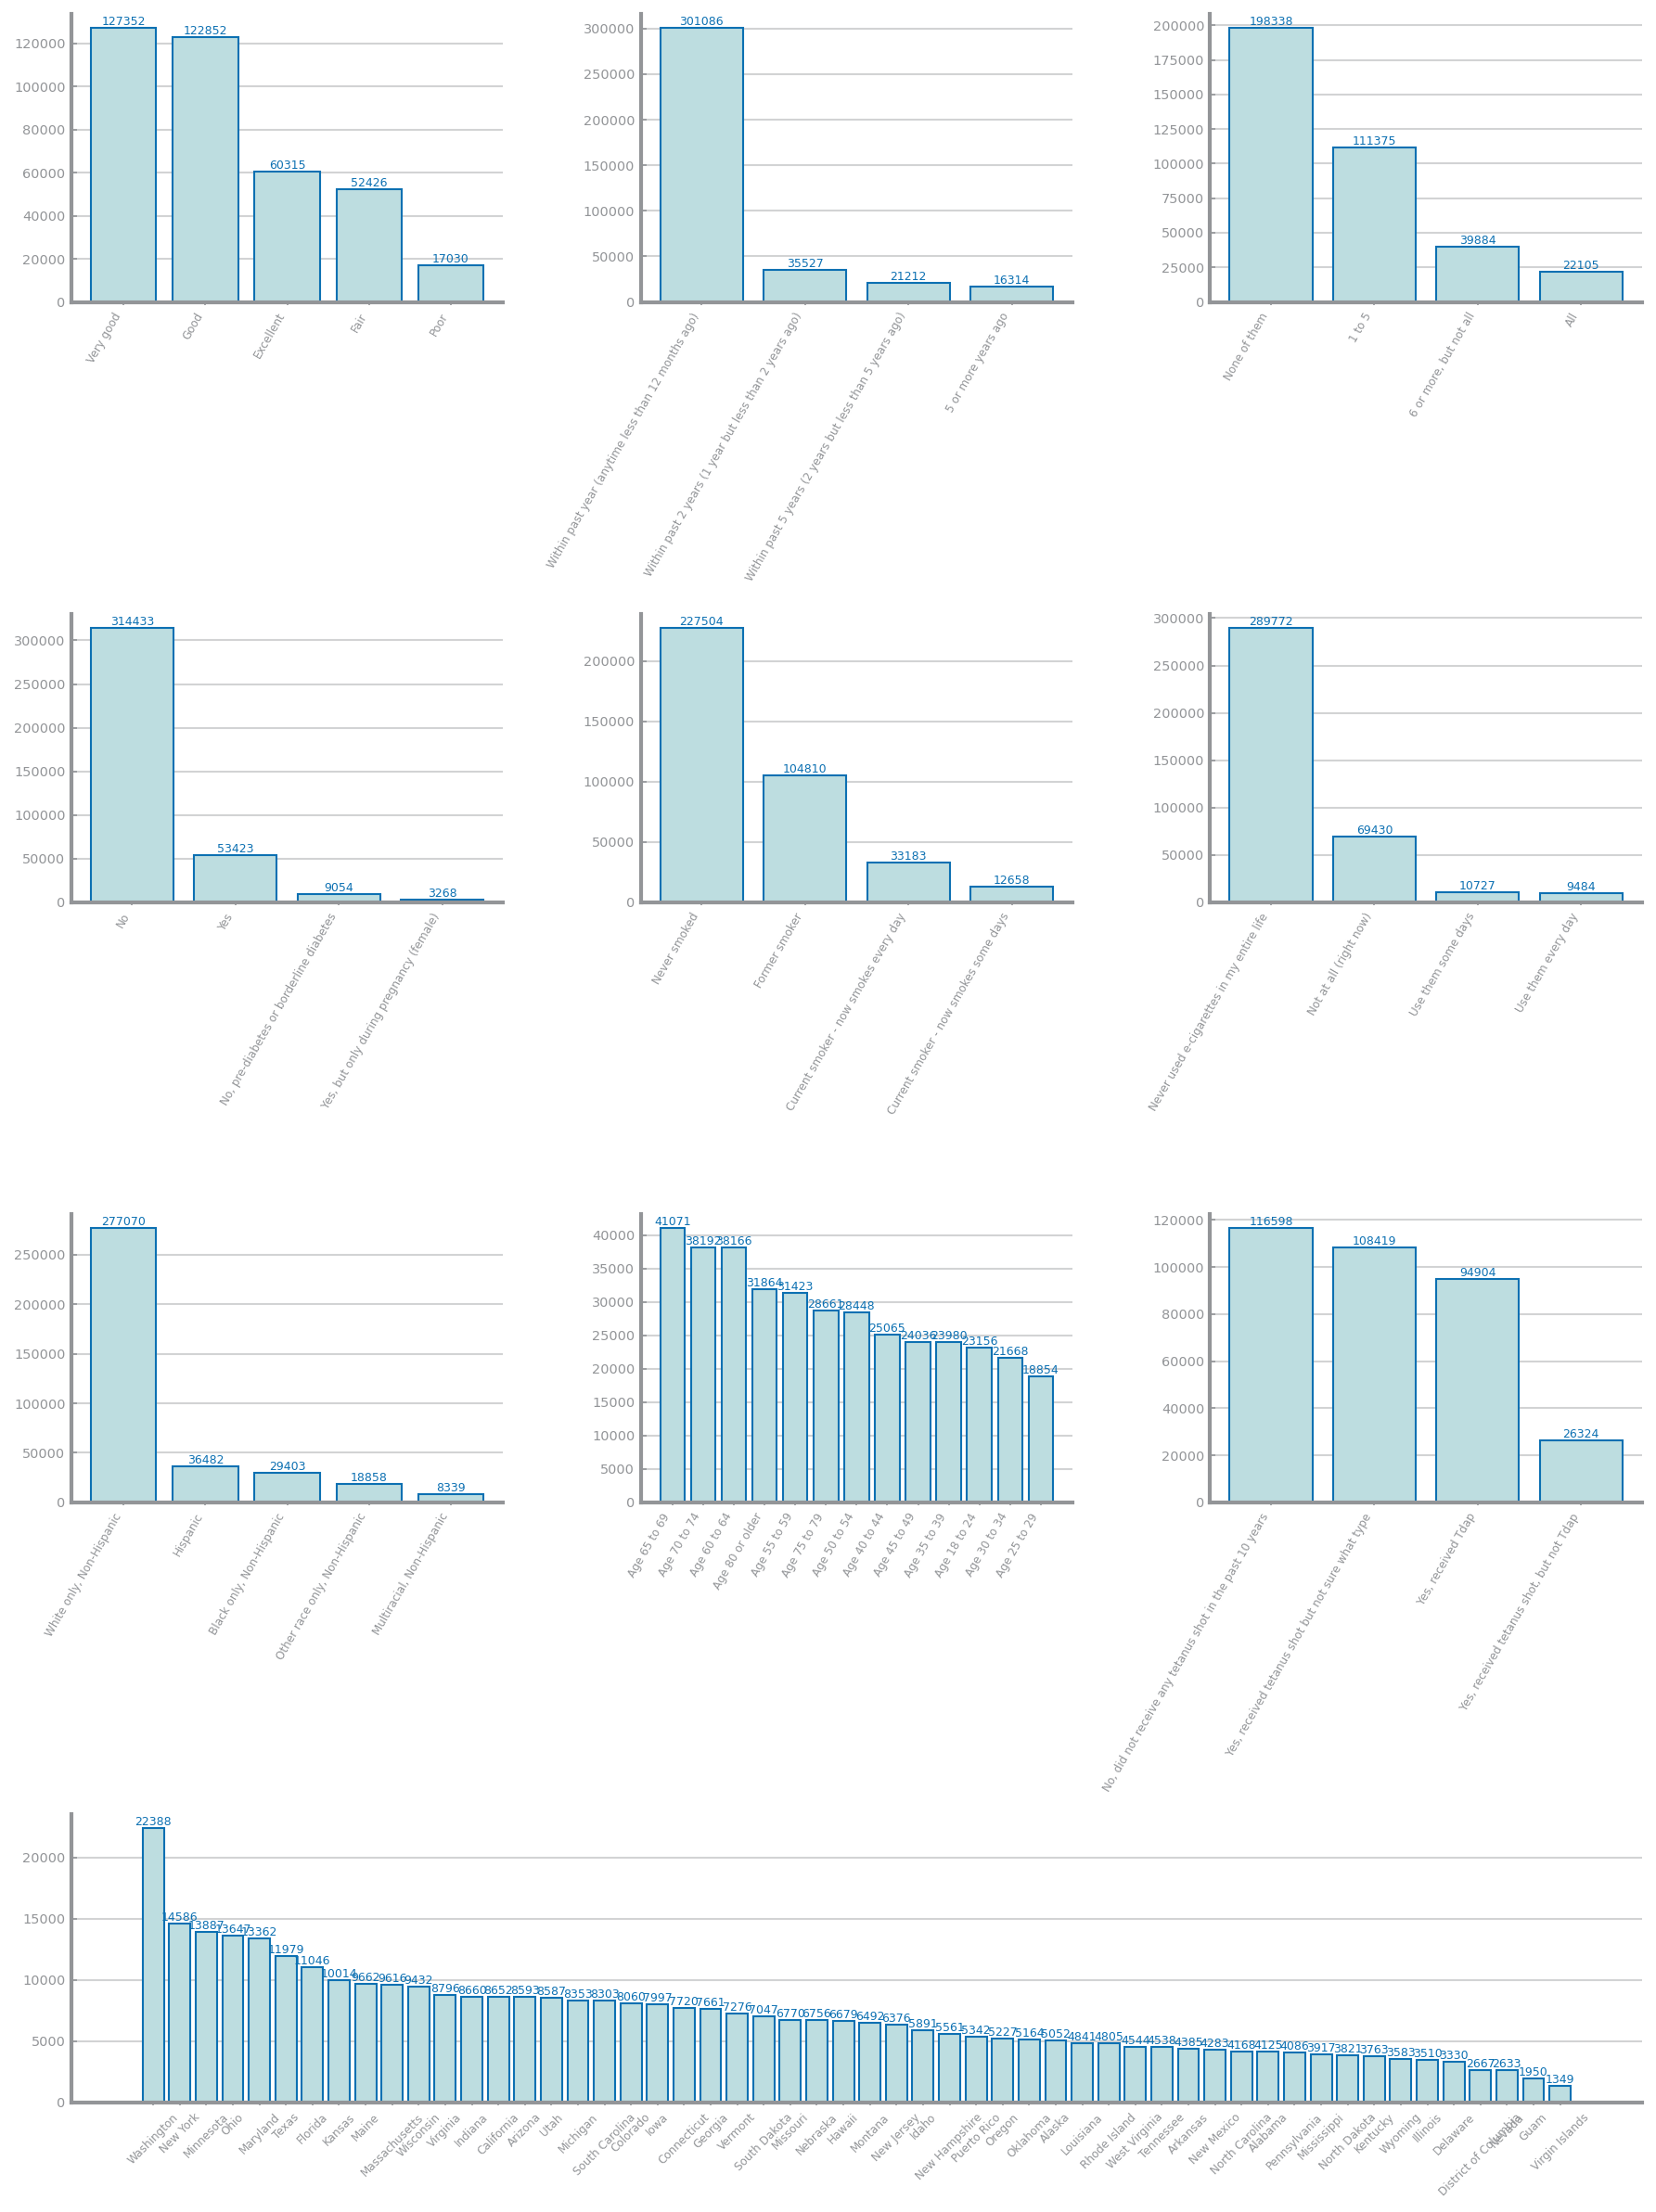

In [22]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Your existing function to get variable types
variables_types = get_variable_types(df)
symbolic = variables_types["symbolic"]

# Function to define the grid, assuming it returns the number of rows and columns for the grid
rows, cols = define_grid(len(symbolic))

# Constants for the height of each plot, modify as necessary
HEIGHT = 4

# Create figure and GridSpec layout
fig = plt.figure(figsize=(cols * HEIGHT, rows * HEIGHT))
gs = gridspec.GridSpec(rows, cols, figure=fig)

# Iterate over the symbolic variables and plot in each subplot
for n in range(len(symbolic)-1):
    # For the last row, make the subplot span all columns
    if n // cols == rows - 1:
        ax = fig.add_subplot(gs[n // cols, :])
    else:
        ax = fig.add_subplot(gs[n // cols, n % cols])
        
    value_counts = df[symbolic[n+1]].value_counts()
    ax.set_title("Granularity for %s" % symbolic[n+1])
    
    # Call plot_bar_chart with the current axis (ax) as an argument
    plot_bar_chart(value_counts.index, value_counts.values, ax=ax)
    plt.xticks(rotation=60, ha='right')
n = len(symbolic)
if n // cols == rows - 1:
    ax = fig.add_subplot(gs[n // cols, :])
else:
    ax = fig.add_subplot(gs[n // cols, n % cols])
    
value_counts = df[symbolic[0]].value_counts()
ax.set_title("Granularity for %s" % symbolic[0])

# Call plot_bar_chart with the current axis (ax) as an argument
plot_bar_chart(value_counts.index, value_counts.values, ax=ax)


# Adjust the layout so titles and labels don't overlap
plt.tight_layout()
plt.savefig(fig_path+"granulation_health")

In [23]:
# def analyse_property_granularity(
#     data: pd.DataFrame, property: str, vars: list[str]
# ) -> np.ndarray:
#     cols: int = len(vars)
#     fig: pd.Figure
#     axs: np.ndarray
#     fig, axs = plt.subplots(1, cols, figsize=(3*cols * HEIGHT, HEIGHT), squeeze=False)
#     fig.suptitle(f"Granularity study for {property}")
#     for i in range(cols):
#         counts: pd.Series[int] = data[vars[i]].value_counts()
#         plot_bar_chart(
#             counts.index.to_list(),
#             counts.to_list(),
#             ax=axs[0, i],
#             title=vars[i],
#             xlabel=vars[i],
#             ylabel="nr records",
#             percentage=False,
#         )
#     return axs

# analyse_property_granularity(df, "location", ["State"])

Index(['18-29', '18-34', '35-49', '50-64', '65-79', 'Age 80 or older'], dtype='object', name='AgeGroup')


<Axes: >

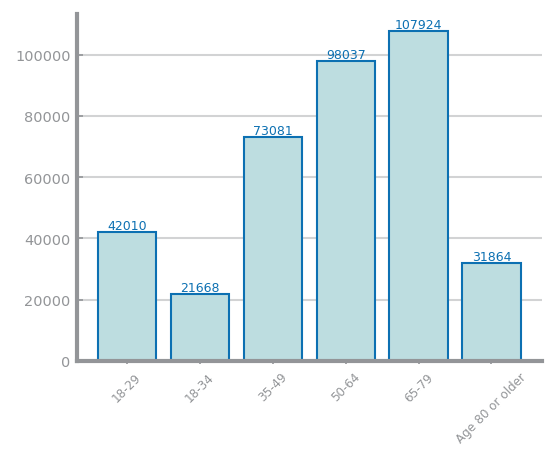

In [10]:
# ages = df["AgeCategory"]
# # plot_bar_chart(ages.value_counts().index, ages.value_counts().values)
# # df["AgeCategory"].value_counts().values

# age_group_mapping = {
#     'Age 18 to 24': '18-29',
#     'Age 25 to 29': '18-29',
#     'Age 30 to 34': '18-34',
#     'Age 35 to 39': '35-49',
#     'Age 40 to 44': '35-49',
#     'Age 45 to 49': '35-49',
#     'Age 50 to 54': '50-64',
#     'Age 55 to 59': '50-64',
#     'Age 60 to 64': '50-64',
#     'Age 65 to 69': '65-79',
#     'Age 70 to 74': '65-79',
#     'Age 75 to 79': '65-79',
#     # Add all mappings here
#     '80 or older': '80 and older'
# }

# # Replace the age category in the DataFrame with the age group.
# df['AgeGroup'] = df['AgeCategory'].replace(age_group_mapping)

# # Now aggregate the counts for each age group.
# age_group_counts = df['AgeGroup'].value_counts().sort_index()

# print(age_group_counts.index)

# plot_bar_chart(age_group_counts.index, age_group_counts.values)
# # age_group_counts.index